In [1]:
#Date:07-07-2022
#Name: Domala Vamshikrishna
#prediction with Seasonal decompose
#Model: EMD_IMF_15_LSTM
#cycle prediction
 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional

In [3]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [4]:

#
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import array

In [5]:
dataset=pd.read_excel(r"IMF_DF3.xlsx")

In [6]:
dataset

,Date,WVHT,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9,imf10,imf11,imf12,imf13,imf14,imf15
0,2016-01-01 00:00:00,3.17,0.032391,-0.036192,0.077518,0.204492,0.072746,-0.358846,-0.238736,-0.010435,0.420925,-0.093889,-0.255215,0.182868,0.462248,0.270399,2.439725
1,2016-01-01 01:00:00,3.12,-0.135688,0.046953,0.103107,0.217267,0.085042,-0.376713,-0.233972,-0.012964,0.421551,-0.094585,-0.255214,0.182980,0.462163,0.270353,2.439721
2,2016-01-01 02:00:00,3.21,0.134417,-0.045741,0.033216,0.202942,0.093321,-0.390976,-0.228597,-0.015460,0.422179,-0.095282,-0.255213,0.183092,0.462078,0.270307,2.439718
3,2016-01-01 03:00:00,2.80,-0.130603,-0.047218,-0.067811,0.163316,0.097444,-0.401397,-0.222599,-0.017922,0.422808,-0.095979,-0.255211,0.183204,0.461993,0.270261,2.439714
4,2016-01-01 04:00:00,3.05,0.124833,0.047569,-0.103740,0.101367,0.097352,-0.407766,-0.215966,-0.020349,0.423439,-0.096676,-0.255209,0.183315,0.461907,0.270214,2.439710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2021-12-31 19:00:00,3.02,0.047155,0.088907,0.090597,-0.071888,-0.025463,0.023052,0.208608,-0.250432,-0.019153,0.189673,-0.153888,0.783139,-0.141097,0.019953,2.230836
52604,2021-12-31 20:00:00,2.96,-0.041196,0.063809,0.053613,0.003308,-0.004362,0.018158,0.212460,-0.253153,-0.020870,0.189104,-0.153707,0.783155,-0.141129,0.019968,2.230842
52605,2021-12-31 21:00:00,2.92,0.009118,-0.036621,-0.027899,0.081907,0.015750,0.012676,0.215197,-0.255384,-0.022604,0.188542,-0.153521,0.783170,-0.141161,0.019983,2.230848
52606,2021-12-31 22:00:00,2.89,0.036451,-0.091462,-0.090402,0.132141,0.033723,0.006667,0.216856,-0.257120,-0.024353,0.187988,-0.153331,0.783182,-0.141192,0.019998,2.230854


In [7]:
dataset.reset_index()['imf15'] #select date and close price for fitting the model

0        2.439725
1        2.439721
2        2.439718
3        2.439714
4        2.439710
           ...   
52603    2.230836
52604    2.230842
52605    2.230848
52606    2.230854
52607    2.230860
Name: imf15, Length: 52608, dtype: float64

In [11]:
dataset=dataset.reset_index()['imf15']

In [12]:
dataset

0        2.439725
1        2.439721
2        2.439718
3        2.439714
4        2.439710
           ...   
52603    2.230836
52604    2.230842
52605    2.230848
52606    2.230854
52607    2.230860
Name: imf15, Length: 52608, dtype: float64

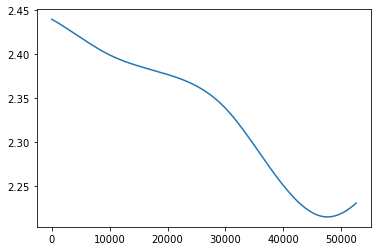

In [13]:
from matplotlib import pyplot as plt
plt.plot(dataset)

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(np.array(dataset).reshape(-1,1))

In [15]:
dataset

array([[1.        ],
       [0.99998346],
       [0.99996692],
       ...,
       [0.07008221],
       [0.07010874],
       [0.07013527]])

In [16]:
training_size=int(len(dataset)*0.75)
test_size=len(dataset)-training_size
train_data,test_data=dataset[0:training_size,:],dataset[training_size:len(dataset),:1]

In [17]:
training_size, test_size

(39456, 13152)

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step): # (len(dataset)-time_step-1) IS CHANGED
		a = dataset[i:(i+time_step), 0]   # input i=0, 0,1,2,3....23    output 24
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 24
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(39432, 24)
(39432,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(13128, 24)
(13128,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
X_train.shape

(39432, 24, 1)

In [24]:
X_test.shape

(13128, 24, 1)

In [25]:

from keras.layers import Dropout
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(24,1)))

model.add(LSTM(32,return_sequences=True))

model.add(LSTM(32))

model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
617/617 [==============================] - 17s 21ms/step - loss: 0.0575 - val_loss: 0.0258
Epoch 2/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0065 - val_loss: 0.0204
Epoch 3/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0064 - val_loss: 0.0152
Epoch 4/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0061 - val_loss: 0.0076
Epoch 5/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 6/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0089 - val_loss: 0.0062
Epoch 7/20
617/617 [==============================] - 10s 16ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 8/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 9/20
617/617 [==============================] - 10s 17ms/step - loss: 0.0069 - val_loss: 0.0012
Epoch 10/20
617/617 [==============================] - 10s 17ms/step - loss: 0.004

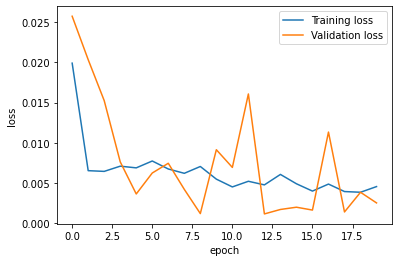

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend()

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error


In [32]:
df1=pd.read_excel("IMF_DF3.xlsx")

In [33]:
df1

,Date,WVHT,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9,imf10,imf11,imf12,imf13,imf14,imf15
0,2016-01-01 00:00:00,3.17,0.032391,-0.036192,0.077518,0.204492,0.072746,-0.358846,-0.238736,-0.010435,0.420925,-0.093889,-0.255215,0.182868,0.462248,0.270399,2.439725
1,2016-01-01 01:00:00,3.12,-0.135688,0.046953,0.103107,0.217267,0.085042,-0.376713,-0.233972,-0.012964,0.421551,-0.094585,-0.255214,0.182980,0.462163,0.270353,2.439721
2,2016-01-01 02:00:00,3.21,0.134417,-0.045741,0.033216,0.202942,0.093321,-0.390976,-0.228597,-0.015460,0.422179,-0.095282,-0.255213,0.183092,0.462078,0.270307,2.439718
3,2016-01-01 03:00:00,2.80,-0.130603,-0.047218,-0.067811,0.163316,0.097444,-0.401397,-0.222599,-0.017922,0.422808,-0.095979,-0.255211,0.183204,0.461993,0.270261,2.439714
4,2016-01-01 04:00:00,3.05,0.124833,0.047569,-0.103740,0.101367,0.097352,-0.407766,-0.215966,-0.020349,0.423439,-0.096676,-0.255209,0.183315,0.461907,0.270214,2.439710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2021-12-31 19:00:00,3.02,0.047155,0.088907,0.090597,-0.071888,-0.025463,0.023052,0.208608,-0.250432,-0.019153,0.189673,-0.153888,0.783139,-0.141097,0.019953,2.230836
52604,2021-12-31 20:00:00,2.96,-0.041196,0.063809,0.053613,0.003308,-0.004362,0.018158,0.212460,-0.253153,-0.020870,0.189104,-0.153707,0.783155,-0.141129,0.019968,2.230842
52605,2021-12-31 21:00:00,2.92,0.009118,-0.036621,-0.027899,0.081907,0.015750,0.012676,0.215197,-0.255384,-0.022604,0.188542,-0.153521,0.783170,-0.141161,0.019983,2.230848
52606,2021-12-31 22:00:00,2.89,0.036451,-0.091462,-0.090402,0.132141,0.033723,0.006667,0.216856,-0.257120,-0.024353,0.187988,-0.153331,0.783182,-0.141192,0.019998,2.230854


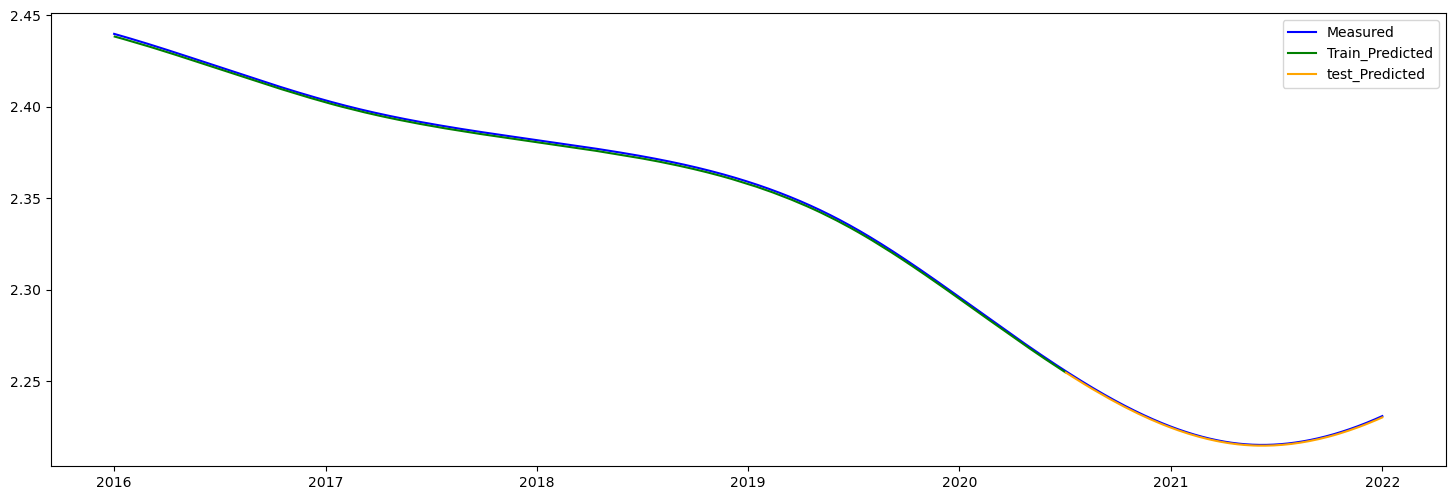

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=24
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(dataset), :] = test_predict
# plot baseline and predictions
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df1['Date'], scaler.inverse_transform(dataset), label='Measured', color='blue')
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(df1['Date'],trainPredictPlot, label='Train_Predicted', color='green')
plt.plot(df1['Date'], testPredictPlot, label='test_Predicted', color='orange')
#plt.plot(df1['Date'])
plt.legend(loc='upper right')
plt.show()

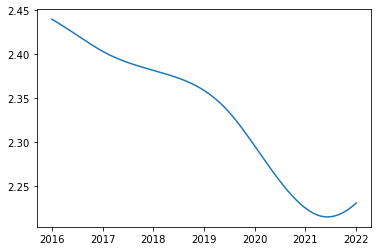

In [35]:
plt.plot(df1['Date'], scaler.inverse_transform(dataset))

In [36]:
df2=df1[24:39456]

In [37]:
df2

,Date,WVHT,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9,imf10,imf11,imf12,imf13,imf14,imf15
24,2016-01-02 00:00:00,2.95,-0.157851,-0.092376,-0.027919,-0.201681,-0.040446,0.087258,0.018897,-0.061159,0.436357,-0.110671,-0.254982,0.185482,0.460165,0.269290,2.439636
25,2016-01-02 01:00:00,3.49,0.189170,0.040033,-0.075171,-0.172890,-0.010486,0.123194,0.033715,-0.062788,0.437018,-0.111373,-0.254962,0.185587,0.460077,0.269244,2.439632
26,2016-01-02 02:00:00,3.65,0.179639,0.102766,-0.095934,-0.125704,0.021455,0.158354,0.048629,-0.064375,0.437682,-0.112075,-0.254942,0.185692,0.459988,0.269197,2.439628
27,2016-01-02 03:00:00,3.30,-0.241147,0.055677,-0.116187,-0.067708,0.054028,0.192522,0.063614,-0.065921,0.438347,-0.112777,-0.254920,0.185797,0.459899,0.269151,2.439625
28,2016-01-02 04:00:00,3.55,-0.048761,-0.013675,-0.130778,-0.004447,0.085882,0.225487,0.078643,-0.067425,0.439013,-0.113479,-0.254898,0.185902,0.459810,0.269105,2.439621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39451,2020-07-01 19:00:00,1.90,-0.002796,0.058912,-0.025484,-0.049325,0.054246,0.025741,0.070521,0.148640,0.014207,-0.182920,-0.087171,0.053345,-0.466832,0.033307,2.255609
39452,2020-07-01 20:00:00,1.85,-0.039524,0.028596,-0.009926,-0.035108,0.038357,0.033519,0.069305,0.147399,0.012570,-0.183687,-0.086872,0.053459,-0.466990,0.033300,2.255600
39453,2020-07-01 21:00:00,1.87,0.026979,-0.047970,0.013806,-0.009423,0.017206,0.040498,0.067708,0.145983,0.010919,-0.184444,-0.086572,0.053573,-0.467147,0.033294,2.255592
39454,2020-07-01 22:00:00,1.86,-0.018530,-0.029158,0.025404,0.018012,-0.005414,0.046535,0.065712,0.144395,0.009254,-0.185193,-0.086270,0.053687,-0.467305,0.033287,2.255583


In [38]:
train_predict.shape

(39432, 1)

In [39]:
trainPredictPlot.shape

(52608, 1)

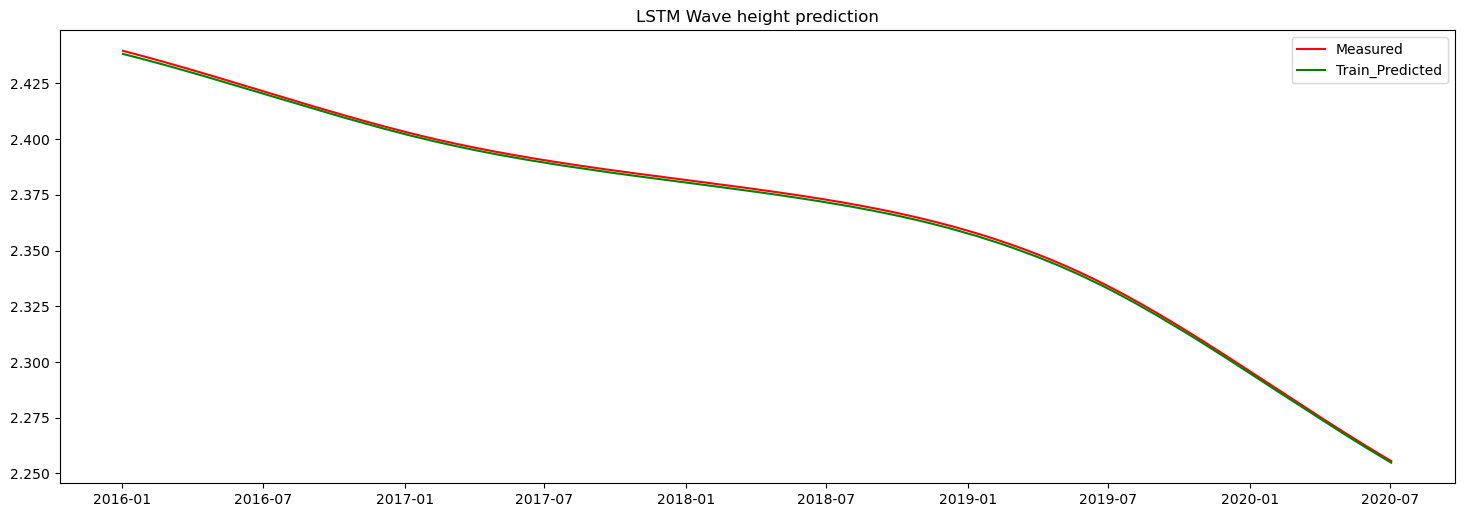

In [40]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df2['Date'],df2['imf15'], label='Measured', color='red')
plt.plot(df2['Date'],train_predict, label='Train_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [41]:
df3=df1[39480:]

In [42]:
df3

,Date,WVHT,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9,imf10,imf11,imf12,imf13,imf14,imf15
39480,2020-07-03 00:00:00,1.61,-0.025882,0.052607,0.016323,0.026403,0.005206,-0.014826,-0.065872,0.058076,-0.036454,-0.201310,-0.077974,0.056554,-0.471329,0.033115,2.255363
39481,2020-07-03 01:00:00,1.60,0.019669,0.023614,0.001614,0.017846,0.009940,-0.012577,-0.069709,0.053606,-0.038211,-0.201798,-0.077637,0.056660,-0.471481,0.033109,2.255354
39482,2020-07-03 02:00:00,1.48,-0.016005,-0.033556,-0.010786,0.006765,0.013674,-0.010111,-0.073118,0.049094,-0.039962,-0.202275,-0.077299,0.056767,-0.471633,0.033102,2.255346
39483,2020-07-03 03:00:00,1.46,0.004508,-0.047070,-0.021721,-0.005130,0.016387,-0.007566,-0.076066,0.044544,-0.041705,-0.202743,-0.076959,0.056873,-0.471785,0.033095,2.255337
39484,2020-07-03 04:00:00,1.49,0.017820,-0.005158,-0.031163,-0.016128,0.018056,-0.005073,-0.078517,0.039961,-0.043440,-0.203200,-0.076619,0.056978,-0.471936,0.033089,2.255329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2021-12-31 19:00:00,3.02,0.047155,0.088907,0.090597,-0.071888,-0.025463,0.023052,0.208608,-0.250432,-0.019153,0.189673,-0.153888,0.783139,-0.141097,0.019953,2.230836
52604,2021-12-31 20:00:00,2.96,-0.041196,0.063809,0.053613,0.003308,-0.004362,0.018158,0.212460,-0.253153,-0.020870,0.189104,-0.153707,0.783155,-0.141129,0.019968,2.230842
52605,2021-12-31 21:00:00,2.92,0.009118,-0.036621,-0.027899,0.081907,0.015750,0.012676,0.215197,-0.255384,-0.022604,0.188542,-0.153521,0.783170,-0.141161,0.019983,2.230848
52606,2021-12-31 22:00:00,2.89,0.036451,-0.091462,-0.090402,0.132141,0.033723,0.006667,0.216856,-0.257120,-0.024353,0.187988,-0.153331,0.783182,-0.141192,0.019998,2.230854


In [43]:
test_predict.shape

(13128, 1)

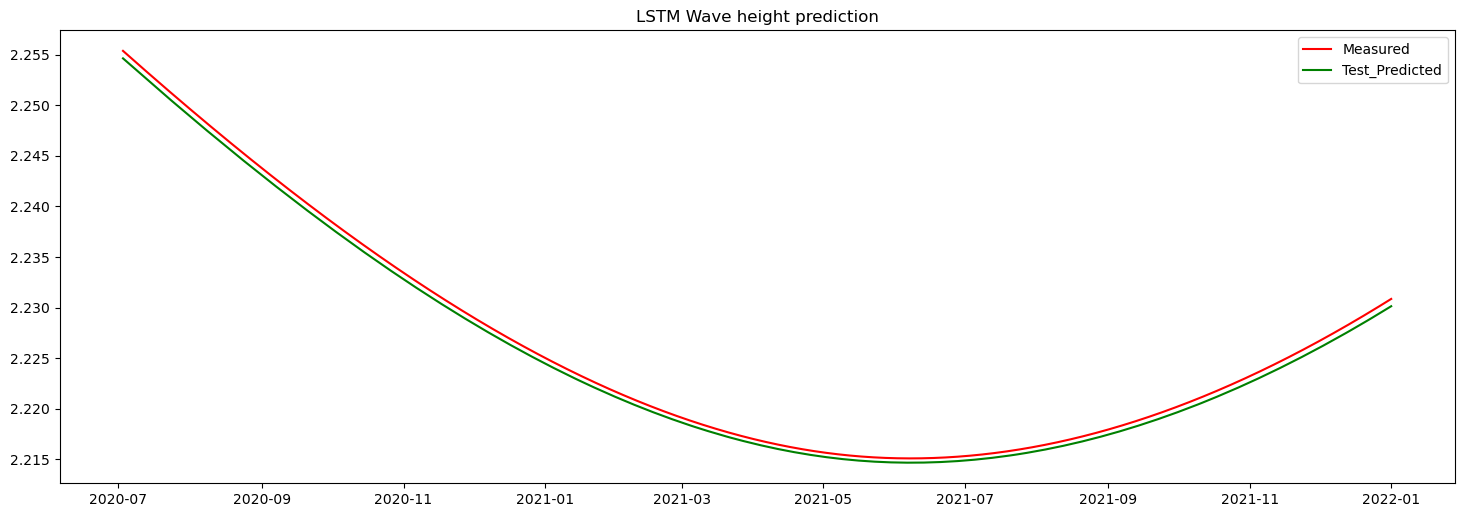

In [44]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df3['Date'],df3['imf15'], label='Measured', color='red')
plt.plot(df3['Date'], test_predict, label='Test_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [45]:
df4=df1[39480:40480]

In [46]:
df4

,Date,WVHT,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9,imf10,imf11,imf12,imf13,imf14,imf15
39480,2020-07-03 00:00:00,1.61,-0.025882,0.052607,0.016323,0.026403,0.005206,-0.014826,-0.065872,0.058076,-0.036454,-0.201310,-0.077974,0.056554,-0.471329,0.033115,2.255363
39481,2020-07-03 01:00:00,1.60,0.019669,0.023614,0.001614,0.017846,0.009940,-0.012577,-0.069709,0.053606,-0.038211,-0.201798,-0.077637,0.056660,-0.471481,0.033109,2.255354
39482,2020-07-03 02:00:00,1.48,-0.016005,-0.033556,-0.010786,0.006765,0.013674,-0.010111,-0.073118,0.049094,-0.039962,-0.202275,-0.077299,0.056767,-0.471633,0.033102,2.255346
39483,2020-07-03 03:00:00,1.46,0.004508,-0.047070,-0.021721,-0.005130,0.016387,-0.007566,-0.076066,0.044544,-0.041705,-0.202743,-0.076959,0.056873,-0.471785,0.033095,2.255337
39484,2020-07-03 04:00:00,1.49,0.017820,-0.005158,-0.031163,-0.016128,0.018056,-0.005073,-0.078517,0.039961,-0.043440,-0.203200,-0.076619,0.056978,-0.471936,0.033089,2.255329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40475,2020-08-13 11:00:00,2.15,0.051083,0.021688,-0.052738,-0.000063,0.034872,0.013230,0.186408,0.067714,0.190153,-0.160018,0.059713,-0.019662,-0.514188,0.024603,2.247205
40476,2020-08-13 12:00:00,2.03,-0.049054,-0.028844,-0.017400,-0.026277,0.050344,0.016128,0.194102,0.064106,0.190534,-0.160535,0.059138,-0.019905,-0.514126,0.024593,2.247197
40477,2020-08-13 13:00:00,2.10,-0.043255,-0.010338,0.030838,-0.045796,0.061755,0.018708,0.201631,0.060488,0.190890,-0.161040,0.058561,-0.020149,-0.514064,0.024582,2.247189
40478,2020-08-13 14:00:00,2.26,0.047452,0.030603,0.051686,-0.049489,0.067881,0.020995,0.208984,0.056859,0.191221,-0.161533,0.057983,-0.020393,-0.514002,0.024572,2.247181


In [47]:
test_predict1=test_predict[0:1000]

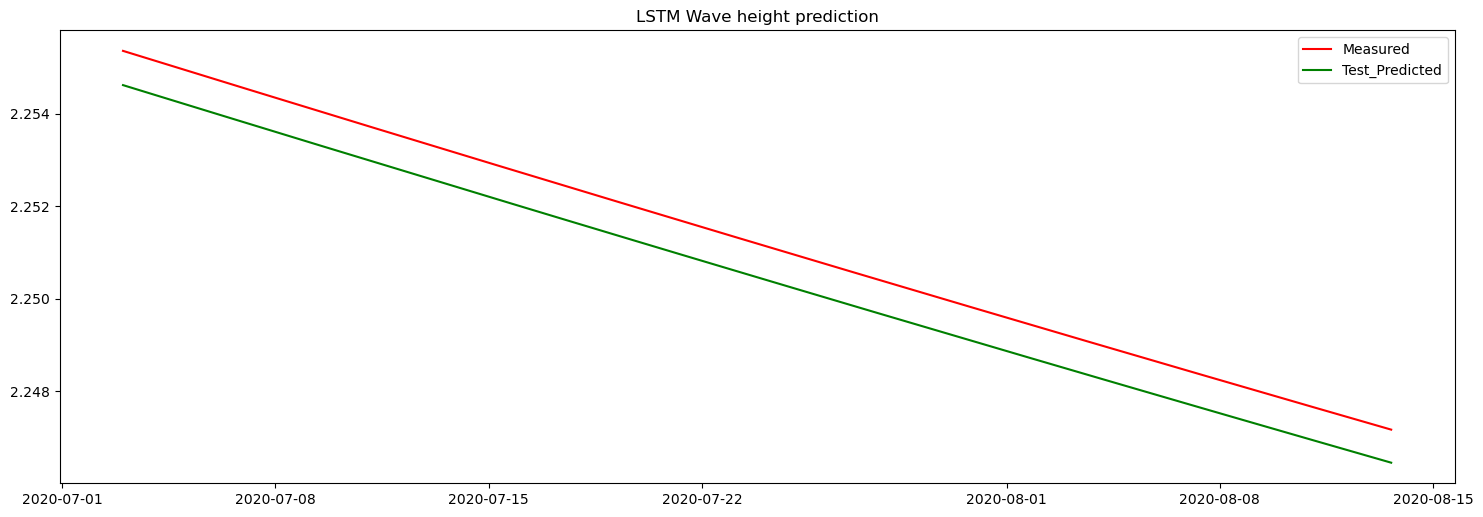

In [48]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df4['Date'],df4['imf15'], label='Measured', color='red')
plt.plot( df4['Date'],test_predict1, label='Test_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [49]:
test_predict.shape

(13128, 1)

In [50]:
df3

,Date,WVHT,imf1,imf2,imf3,imf4,imf5,imf6,imf7,imf8,imf9,imf10,imf11,imf12,imf13,imf14,imf15
39480,2020-07-03 00:00:00,1.61,-0.025882,0.052607,0.016323,0.026403,0.005206,-0.014826,-0.065872,0.058076,-0.036454,-0.201310,-0.077974,0.056554,-0.471329,0.033115,2.255363
39481,2020-07-03 01:00:00,1.60,0.019669,0.023614,0.001614,0.017846,0.009940,-0.012577,-0.069709,0.053606,-0.038211,-0.201798,-0.077637,0.056660,-0.471481,0.033109,2.255354
39482,2020-07-03 02:00:00,1.48,-0.016005,-0.033556,-0.010786,0.006765,0.013674,-0.010111,-0.073118,0.049094,-0.039962,-0.202275,-0.077299,0.056767,-0.471633,0.033102,2.255346
39483,2020-07-03 03:00:00,1.46,0.004508,-0.047070,-0.021721,-0.005130,0.016387,-0.007566,-0.076066,0.044544,-0.041705,-0.202743,-0.076959,0.056873,-0.471785,0.033095,2.255337
39484,2020-07-03 04:00:00,1.49,0.017820,-0.005158,-0.031163,-0.016128,0.018056,-0.005073,-0.078517,0.039961,-0.043440,-0.203200,-0.076619,0.056978,-0.471936,0.033089,2.255329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2021-12-31 19:00:00,3.02,0.047155,0.088907,0.090597,-0.071888,-0.025463,0.023052,0.208608,-0.250432,-0.019153,0.189673,-0.153888,0.783139,-0.141097,0.019953,2.230836
52604,2021-12-31 20:00:00,2.96,-0.041196,0.063809,0.053613,0.003308,-0.004362,0.018158,0.212460,-0.253153,-0.020870,0.189104,-0.153707,0.783155,-0.141129,0.019968,2.230842
52605,2021-12-31 21:00:00,2.92,0.009118,-0.036621,-0.027899,0.081907,0.015750,0.012676,0.215197,-0.255384,-0.022604,0.188542,-0.153521,0.783170,-0.141161,0.019983,2.230848
52606,2021-12-31 22:00:00,2.89,0.036451,-0.091462,-0.090402,0.132141,0.033723,0.006667,0.216856,-0.257120,-0.024353,0.187988,-0.153331,0.783182,-0.141192,0.019998,2.230854


In [51]:
test_predict2=test_predict[0:336]

In [52]:
df5=df1[39480:39816]

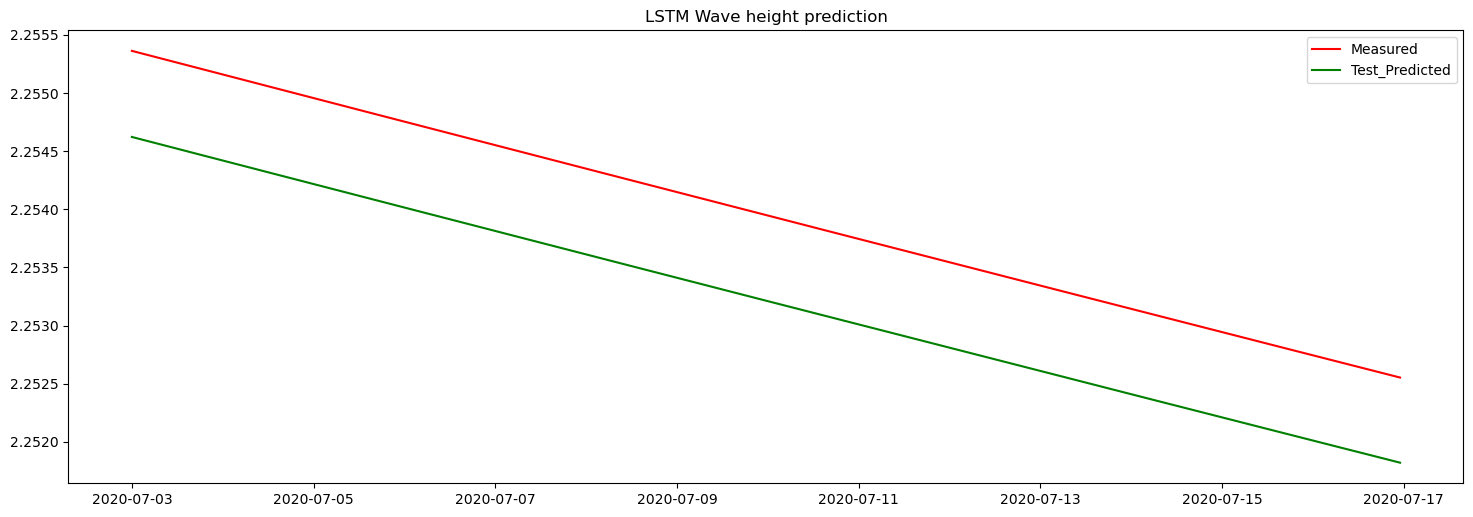

In [53]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df5['Date'],df5['imf15'], label='Measured', color='red')
plt.plot(df5['Date'], test_predict2, label='Test_Predicted', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [54]:
EMD_IMF_15_train=pd.DataFrame(train_predict)

In [55]:
EMD_IMF_15_train.to_excel("EMD_IMF_15_train.xlsx")

In [56]:
EMD_IMF_15_test=pd.DataFrame(test_predict)

In [57]:
EMD_IMF_15_test.to_excel("EMD_IMF_15_test.xlsx")